In [33]:
if 'libraries_imported' not in globals():
    libraries_imported = False

if libraries_imported == False:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from datetime import datetime, timedelta
    from datetime import datetime
    from scipy.interpolate import make_interp_spline
    import plotly.graph_objects as go
    from scipy.signal import butter, filtfilt
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    from tensorflow.keras.layers import Input
    import sys
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    import numpy as np
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import RobustScaler
    import tensorflow as tf
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from sklearn.preprocessing import RobustScaler
    import joblib
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    import numpy as np
    import pandas as pd
    import tensorflow as tf
    import random
    import os
    import json
    import joblib
    from tensorflow.keras import Sequential
    from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from sklearn.preprocessing import RobustScaler
    from sklearn.model_selection import train_test_split
    from keras_tuner import RandomSearch, HyperModel
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.utils.class_weight import compute_class_weight


In [34]:
title = 'datasets/SaniWASE_Data_Cleaned_t1.csv'  # Ensure the file name includes .csv
feed_analysis_df = pd.read_csv(title)  # Load the CSV file

if not isinstance(feed_analysis_df.columns[0], str):
    new_header = feed_analysis_df.iloc[0]  # This grabs the first row for the header
    feed_analysis_df = feed_analysis_df[1:]  # Take the data less the header row
    feed_analysis_df.columns = new_header  # Set the header row as the DataFrame header

# Remove duplicate indices if they exist
feed_analysis_df = feed_analysis_df[~feed_analysis_df.index.duplicated(keep='first')]

# Convert 'datetime' column to datetime format
feed_analysis_df['datetime'] = pd.to_datetime(feed_analysis_df['datetime'], format='%d.%m.%y', errors='raise')
feed_analysis_df['date'] = feed_analysis_df['datetime'].dt.date

# Optional: apply_date_range_df function can be defined and used here if needed
# df = apply_date_range_df(df)

# Sorting values by date
feed_analysis_df = feed_analysis_df.sort_values(by='date')

# Drop specified columns
columns_to_drop = ['datetime', 'fos', 'tac', 'index', 'fos', 'tac', 'f/m_ratio',  't1_olr', 't1_cod', 'h2s_ppm', 'fostac']
feed_analysis_df = feed_analysis_df.drop(columns=columns_to_drop)


display(feed_analysis_df.columns)






Index(['eq_ph', 'eq_cod', 'feed_vol', 't1_ph', 'current', 'temp',
       'methane_percentage', 'hrt', 'biogas_vol', 'date'],
      dtype='object')

In [35]:
df = feed_analysis_df.copy()
df.set_index('date', inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.reset_index(inplace=True)
df_interpolated = df.interpolate(method = 'ffill')

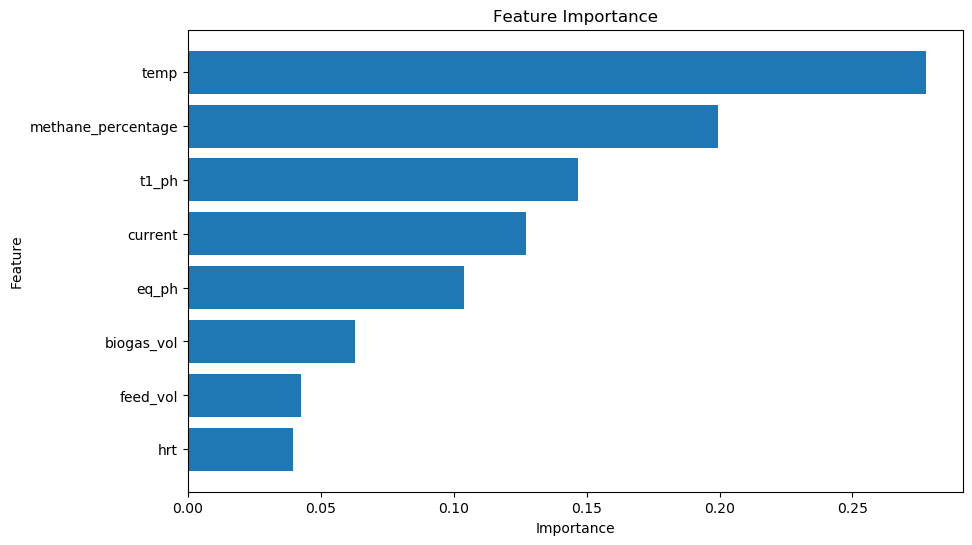

In [36]:

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




# Prepare the data
# Dropping the 'fostac' and 'date' columns to isolate the features
X = df_interpolated.drop(['eq_cod', 'date'], axis=1)
y = df_interpolated['eq_cod']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling
# Initialize and train the Random Forest regressor
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Feature importance analysis
# Extract feature importances from the model
importances = model.feature_importances_
features = X_train.columns


# Sorting the features by importance
indices = np.argsort(importances)  # Get the indices of sorted importances
sorted_features = [features[i] for i in indices]  # Reorder the features
sorted_importances = importances[indices]  # Reorder the importances

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()



In [37]:

df_interpolated  = df_interpolated[['date', 't1_ph', 'biogas_vol', 'methane_percentage', 'current', 'temp', 'eq_cod']]
window_size = 3
df_interpolated['t1_ph_ma'] = df_interpolated['t1_ph'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['biogas_vol_ma'] = df_interpolated['biogas_vol'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['methane_percentage_ma'] = df_interpolated['methane_percentage'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['current_ma'] = df_interpolated['current'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['temp_ma'] = df_interpolated['temp'].rolling(window=window_size, min_periods=1).mean()

# Display the DataFrame to verify the moving averages
print(df_interpolated.head())


df_interpolated = df_interpolated.interpolate(method = 'ffill')
df_interpolated = df_interpolated.interpolate(method = 'bfill')

         date  t1_ph  biogas_vol  methane_percentage  current  temp  eq_cod  \
0  2022-06-07    7.1      1232.0                65.1     1652  36.8   14694   
1  2022-06-08    7.2      1019.0                68.0     1652  36.8   15633   
2  2022-06-09    7.3      1005.0                70.9     1652  36.8   11950   
3  2022-06-10    7.3       892.0                65.7     1652  34.8   14399   
4  2022-06-11    7.3      1100.0                65.7     1652  34.8   14399   

   t1_ph_ma  biogas_vol_ma  methane_percentage_ma  current_ma    temp_ma  
0  7.100000    1232.000000              65.100000      1652.0  36.800000  
1  7.150000    1125.500000              66.550000      1652.0  36.800000  
2  7.200000    1085.333333              68.000000      1652.0  36.800000  
3  7.266667     972.000000              68.200000      1652.0  36.133333  
4  7.300000     999.000000              67.433333      1652.0  35.466667  


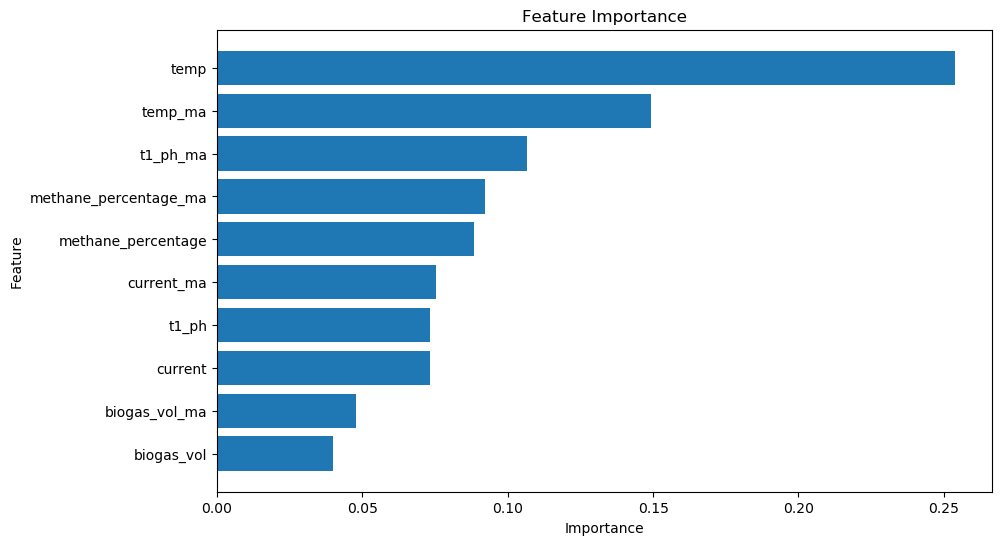

In [38]:

# Prepare the data
# Dropping the 'fostac' and 'date' columns to isolate the features
X = df_interpolated.drop(['eq_cod', 'date'], axis=1)
y = df_interpolated['eq_cod']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling
# Initialize and train the Random Forest regressor
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Feature importance analysis
# Extract feature importances from the model
importances = model.feature_importances_
features = X_train.columns


# Sorting the features by importance
indices = np.argsort(importances)  # Get the indices of sorted importances
sorted_features = [features[i] for i in indices]  # Reorder the features
sorted_importances = importances[indices]  # Reorder the importances

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [39]:
import os
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

# Set seeds for reproducibility
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'



print(df_interpolated.describe())
df = df_interpolated.copy()  # Assuming df is your initial DataFrame that needs preprocessing

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(subset=['eq_cod'], inplace=True)  # Assuming 'eq_cod' is your target variable

# Fix binning issue
bins = [0, 0.3, 2.0, np.inf]  # Add np.inf to include all possible upper values
labels = [0, 1, 2]  # Three labels for three intervals
df['eq_cod_category'] = pd.cut(df['eq_cod'], bins=bins, labels=labels, include_lowest=True)

# Check distribution clearly:
print(df['eq_cod_category'].value_counts())

# Drop rows with NaN categories if any (though include_lowest=True should handle edge cases)
df.dropna(subset=['eq_cod_category'], inplace=True)
df['eq_cod_category'] = df['eq_cod_category'].astype(int)

# Assuming there are other columns, adjust the number of features to exclude
num_features = df.shape[1] - 1  # Adjusted to exclude just the new category column

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['eq_cod_category']),
    y=df['eq_cod_category'].values  # Ensure y is passed as a numpy array
)

class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)


            t1_ph   biogas_vol  methane_percentage      current        temp  \
count  144.000000   144.000000          144.000000   144.000000  144.000000   
mean     7.208361  1569.458333           68.090972  2161.798611   32.909722   
std      0.214277   624.596459            4.289341   715.696498    3.072056   
min      6.500000   254.000000           51.600000   240.000000   20.300000   
25%      7.095000  1098.500000           65.700000  1865.750000   31.375000   
50%      7.200000  1387.000000           67.800000  2283.000000   34.100000   
75%      7.300000  2077.500000           70.400000  2515.000000   34.800000   
max      7.701000  3127.500000           82.000000  3990.000000   36.800000   

             eq_cod    t1_ph_ma  biogas_vol_ma  methane_percentage_ma  \
count    144.000000  144.000000     144.000000             144.000000   
mean   15938.868056    7.209472    1557.930556              68.087847   
std     4298.896562    0.182364     575.492001               3.478770

,date,t1_ph,biogas_vol,methane_percentage,current,temp,eq_cod,t1_ph_ma,biogas_vol_ma,methane_percentage_ma,current_ma,temp_ma
0,2022-06-07,7.1,1232.0,65.1,1652,36.8,14694,7.100000,1232.000000,65.100000,1652.0,36.800000
1,2022-06-08,7.2,1019.0,68.0,1652,36.8,15633,7.150000,1125.500000,66.550000,1652.0,36.800000
2,2022-06-09,7.3,1005.0,70.9,1652,36.8,11950,7.200000,1085.333333,68.000000,1652.0,36.800000
3,2022-06-10,7.3,892.0,65.7,1652,34.8,14399,7.266667,972.000000,68.200000,1652.0,36.133333
4,2022-06-11,7.3,1100.0,65.7,1652,34.8,14399,7.300000,999.000000,67.433333,1652.0,35.466667



Training on Fold 1/5
Fold 1 Validation Accuracy: 1.0000


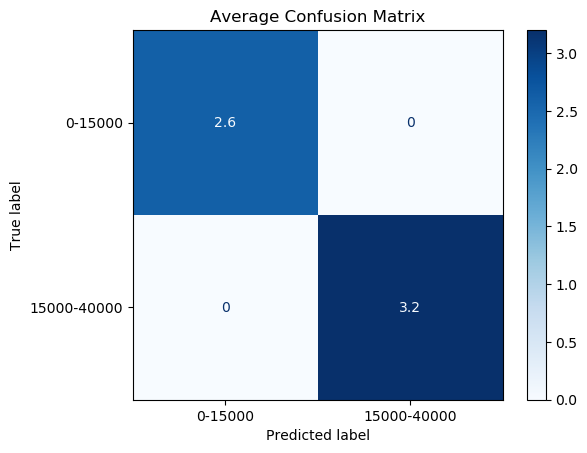

              precision    recall  f1-score   support

     0-15000       1.00      1.00      1.00        13
 15000-40000       1.00      1.00      1.00        16

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Training on Fold 2/5
Fold 2 Validation Accuracy: 1.0000


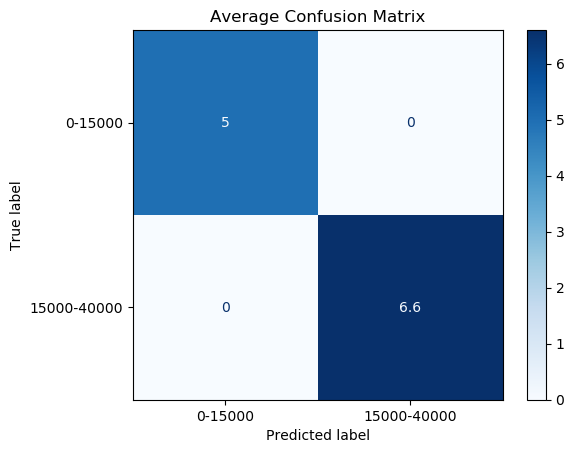

              precision    recall  f1-score   support

     0-15000       1.00      1.00      1.00        12
 15000-40000       1.00      1.00      1.00        17

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Training on Fold 3/5
Fold 3 Validation Accuracy: 1.0000


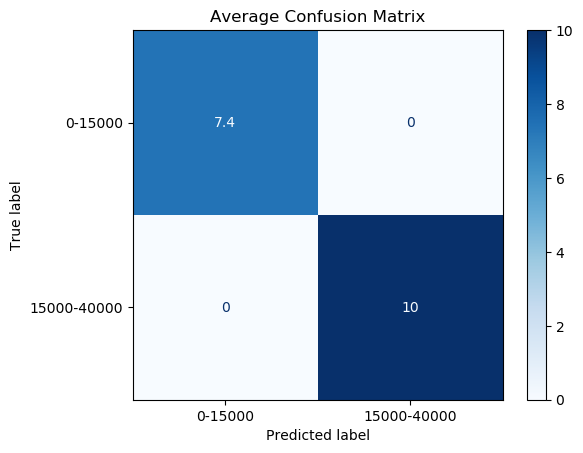

              precision    recall  f1-score   support

     0-15000       1.00      1.00      1.00        12
 15000-40000       1.00      1.00      1.00        17

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Training on Fold 4/5
Fold 4 Validation Accuracy: 0.9655


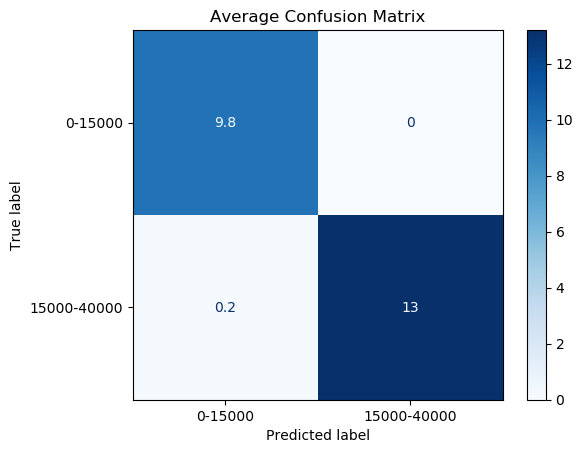

              precision    recall  f1-score   support

     0-15000       0.92      1.00      0.96        12
 15000-40000       1.00      0.94      0.97        17

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29


Training on Fold 5/5
Fold 5 Validation Accuracy: 1.0000


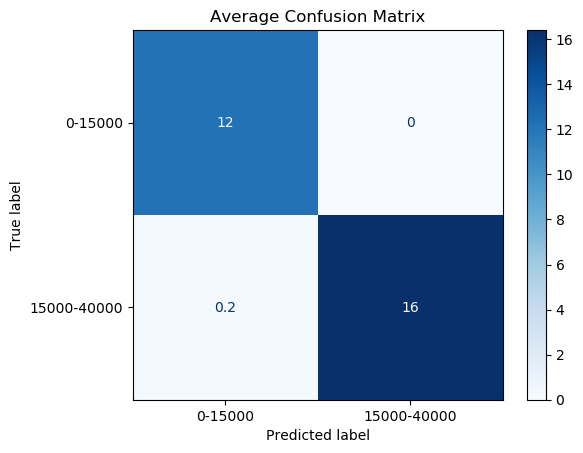

              precision    recall  f1-score   support

     0-15000       1.00      1.00      1.00        12
 15000-40000       1.00      1.00      1.00        16

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28


Final Average Validation Accuracy Across 5 Folds: 0.9931


In [ ]:
import numpy as np
import pandas as pd
import os
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

df = df_interpolated.copy()
df = df.ffill()  # Forward fill to handle remaining NaNs
display(df.head())
target = 'eq_cod'
bins = [0, 15000, 40000]
labels = [f"{bin_start}-{bin_end}" for bin_start, bin_end in zip(bins[:-1], bins[1:])]

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(subset=[target], inplace=True)

df['fostac_category'] = pd.cut(df[target], bins=bins, labels=labels, include_lowest=True)
df.dropna(subset=['fostac_category'], inplace=True)  # Ensure no NaNs in target variable

X = df.select_dtypes(include=[np.number])  # Ensuring only numeric data is included
y = df['fostac_category'].cat.codes  # Convert categories to numeric codes

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Directory for saving scaler and models
os.makedirs('model_params', exist_ok=True)
scaler_path = os.path.join('model_params', 'robust_scaler.pkl')
joblib.dump(scaler, scaler_path)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
fold_results = []

cm_accumulator = np.zeros((len(labels), len(labels)))  # Initialize confusion matrix accumulator

for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, y)):
    print(f"\nTraining on Fold {fold+1}/{n_splits}")
    
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    rf_model.fit(X_train_smote, y_train_smote)
    y_pred = rf_model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    print(f"Fold {fold+1} Validation Accuracy: {accuracy:.4f}")
    fold_results.append(accuracy)

    cm = confusion_matrix(y_val, y_pred, labels=np.arange(len(labels)))
    cm_accumulator += cm

    # Save the model for each fold
    fold_model_path = os.path.join('model_params', f'random_forest_model_fold_{fold+1}.pkl')
    joblib.dump(rf_model, fold_model_path)
    # Display the average confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_accumulator / n_splits, display_labels=labels)
    disp.plot(cmap='Blues')
    plt.title('Average Confusion Matrix')
    plt.savefig('model_params/figures/average_confusion_matrix.png')
    plt.show()

    print(classification_report(y_val, y_pred, target_names=labels))

avg_accuracy = np.mean(fold_results)
print(f"\nFinal Average Validation Accuracy Across {n_splits} Folds: {avg_accuracy:.4f}")
print("")

